<a href="https://colab.research.google.com/github/Adrianus-Bagas/EDA_COVID-19/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Menggunakan Data COVID-19

## 1. Import beberapa libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

## 2. Load Data

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/dataset/COVID-19 Coronavirus.csv"
df = pd.read_csv(path)
df

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


## 3. Melihat Deskripsi Data secara Keseluruhan

In [5]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


**Dari tabel tersebut, dapat dilihat deskripsi data secara statistik. Rata-rata kasus adalah sekitar 2184781, rata-rata kematian adalah sekitar 27448, dan rata-rata persentase kematian adalah sekitar 1,44%.**

## 4. Melihat Populasi Setiap Negara Melalui Peta

In [6]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Population'],
    text = df['Country'],
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Populasi dalam Miliar',
))

fig.update_layout(
    title_text='Populasi Setiap Negara',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Sumber: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

**Melalui peta tersebut, jelas terlihat bahwa negara Tiongkok dan negara India memiliki populasi yang tertinggi diantara negara lainnya.**

## 4. Melihat Negara dengan Kasus Tertinggi dan Terendah, Kematian Tertinggi dan Terendah, Persentase Kematian Tertinggi dan Terendah

In [7]:
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Total Cases'],
    text = df['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Kasus COVID 19 dalam Juta',
))

fig.update_layout(
    title_text='Kasus COVID 19 Setiap Negara',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Sumber: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

**Melalui peta, terlihat bahwa USA adalah negara dengan kasus COVID terbanyak.**

In [17]:
df_min_case = df[df["Total Cases"]==df["Total Cases"].min()]
df_min_case

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.0


**Negara dengan Kasus COVID-19 terkecil adalah Micronesia yang terletak pada Kontinen Oceania dengan 1 Kasus**

In [16]:
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Total Deaths'],
    text = df['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Kasus Kematian akibat COVID 19 dalam Juta',
))

fig.update_layout(
    title_text='Kasus Kematian akibat COVID 19 Setiap Negara',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Sumber: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

**Melalui peta, Negara USA menjadi negara dengan kasus kematian akibat COVID-19 terbanyak**

In [18]:
df_min_death = df[df["Total Deaths"]==df["Total Deaths"].min()]
df_min_death

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.0
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.0
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.0
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.0
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.0
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.0
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.0
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.0


**Terdapat 8 Negara dengan kasus kematian akibat COVID-19 dengan nilai 0, 4 diantaranya berasal dari kontinen Oceania.**

In [19]:
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Death percentage'],
    text = df['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Persentase Kasus Kematian akibat COVID 19 dalam Persen',
))

fig.update_layout(
    title_text='Persentase Kasus Kematian akibat COVID 19 Setiap Negara',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Sumber: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

**Meskipun bukan negara dengan kasus atau kematian tertinggi, negara Yemen menjadi negara dengan persentase kematian akibat COVID-19 tertinggi.**

In [20]:
df_min_percent = df[df["Death percentage"]==df["Death percentage"].min()]
df_min_percent

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.0
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.0
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.0
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.0
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.0
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.0
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.0
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.0


**Sama seperti sebelumnya, 8 negara yang sama menjadi negara dengan persentase kematian terendah.**

## 5. Melihat Kontinen dengan Kasus Tertinggi dan Terendah, Kematian Tertinggi dan Terendah, dan Persentase Tertinggi dan Terendah

In [23]:
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Latin America and the Caribbean',
       'Oceania', 'Northern America'], dtype=object)

In [27]:
case_asia = df[df["Continent"]=="Asia"]
case_europe = df[df["Continent"]=="Europe"]
case_africa = df[df["Continent"]=="Africa"]
case_latin = df[df["Continent"]=="Latin America and the Caribbean"]
case_oceania = df[df["Continent"]=="Oceania"]
case_northern = df[df["Continent"]=="Northern America"]

In [32]:
sum_case_asia = case_asia["Total Cases"].sum()
sum_case_europe = case_europe["Total Cases"].sum()
sum_case_africa = case_africa["Total Cases"].sum()
sum_case_latin = case_latin["Total Cases"].sum()
sum_case_oceania = case_oceania["Total Cases"].sum()
sum_case_northern = case_northern["Total Cases"].sum()

In [33]:
sum_death_asia = case_asia["Total Deaths"].sum()
sum_death_europe = case_europe["Total Deaths"].sum()
sum_death_africa = case_africa["Total Deaths"].sum()
sum_death_latin = case_latin["Total Deaths"].sum()
sum_death_oceania = case_oceania["Total Deaths"].sum()
sum_death_northern = case_northern["Total Deaths"].sum()

In [34]:
sum_percent_asia = (sum_death_asia/sum_case_asia)*100
sum_percent_europe = (sum_death_europe/sum_case_europe)*100
sum_percent_africa = (sum_death_africa/sum_case_africa)*100
sum_percent_latin = (sum_death_latin/sum_case_latin)*100
sum_percent_oceania = (sum_death_oceania/sum_case_oceania)*100
sum_percent_northern = (sum_death_northern/sum_case_northern)*100

In [50]:
case = [sum_case_asia, sum_case_europe, sum_case_africa, sum_case_latin, sum_case_oceania, sum_case_northern]
death = [sum_death_asia, sum_death_europe, sum_death_africa, sum_death_latin, sum_death_oceania, sum_death_northern]
percent = [sum_percent_asia, sum_percent_europe, sum_percent_africa, sum_percent_latin, sum_percent_oceania, sum_percent_northern]
continent = ['Asia', 'Europe', 'Africa', 'Latin America and the Caribbean', 'Oceania', 'Northern America']

In [51]:
dict_covid = {
    'Continent':continent,
    'Total Cases':case,
    'Total Deaths':death,
    'Death Percentage':percent
}
df_new = pd.DataFrame(dict_covid)
df_new

,Continent,Total Cases,Total Deaths,Death Percentage
0,Asia,140957179,1405003,0.996759
1,Europe,180332483,1775727,0.984696
2,Africa,11764207,252873,2.149512
3,Latin America and the Caribbean,67509231,1686828,2.498663
4,Oceania,5647957,9336,0.165299
5,Northern America,85364770,1046062,1.225402


No handles with labels found to put in legend.


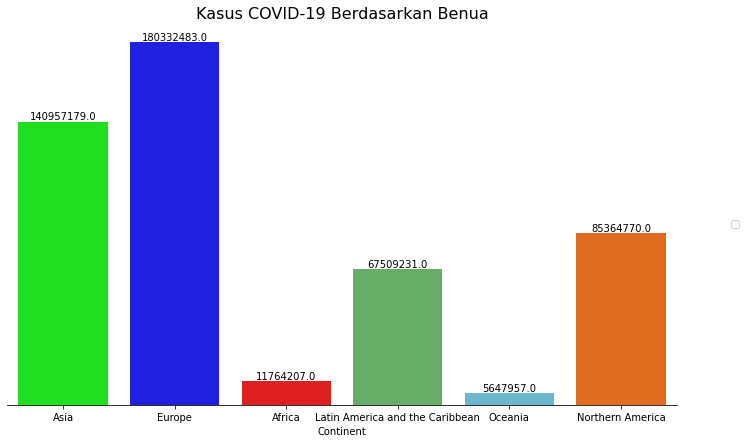

In [53]:
plt.figure(figsize = (12,7))
color = ["#00FF00","#0000FF", '#FF0000', "#5cb85c", "#5bc0de", "#FF6600"]
ax = sns.barplot(x=df_new['Continent'], y=df_new['Total Cases'], palette = color)
ax.set_title ("Kasus COVID-19 Berdasarkan Benua",fontsize= 16)
ax.legend (fontsize= 10, bbox_to_anchor=(1.1, 0.5))
ax.xaxis.set_tick_params(labelsize=10)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height), ha='center', va='bottom', fontsize = 10)

**Dari grafik tersebut, terlihat bahwa kontinen Eropa merupakan kontinen dengan kasus tertinggi, sedangkan kontinen oceania merupakan kontinen dengan kasus terendah**

No handles with labels found to put in legend.


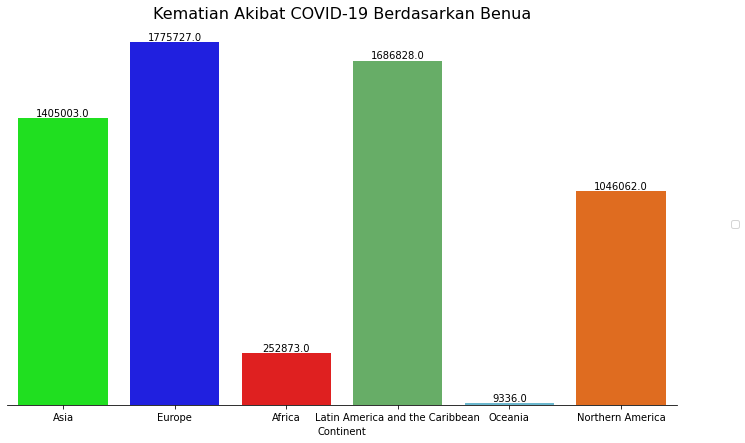

In [55]:
plt.figure(figsize = (12,7))
color = ["#00FF00","#0000FF", '#FF0000', "#5cb85c", "#5bc0de", "#FF6600"]
ax = sns.barplot(x=df_new['Continent'], y=df_new['Total Deaths'], palette = color)
ax.set_title ("Kematian Akibat COVID-19 Berdasarkan Benua",fontsize= 16)
ax.legend (fontsize= 10, bbox_to_anchor=(1.1, 0.5))
ax.xaxis.set_tick_params(labelsize=10)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height), ha='center', va='bottom', fontsize = 10)

**Dari grafik tersebut, terlihat bahwa kontinen Eropa merupakan kontinen dengan kematian tertinggi, sedangkan kontinen oceania merupakan kontinen dengan kematian terendah**

No handles with labels found to put in legend.


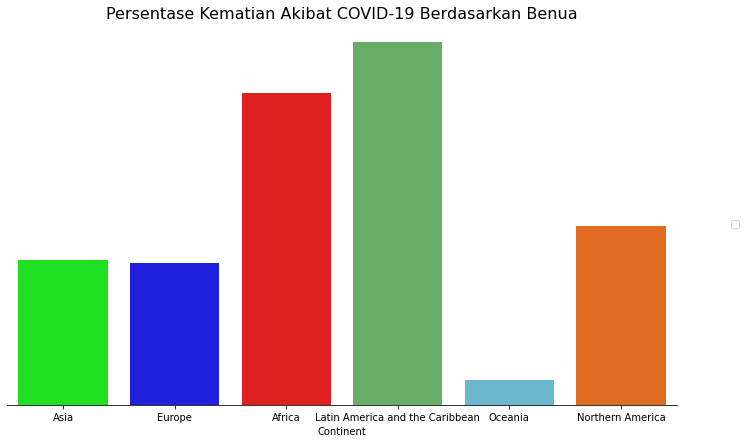

In [58]:
plt.figure(figsize = (12,7))
color = ["#00FF00","#0000FF", '#FF0000', "#5cb85c", "#5bc0de", "#FF6600"]
ax = sns.barplot(x=df_new['Continent'], y=df_new['Death Percentage'].round(2), palette = color)
ax.set_title ("Persentase Kematian Akibat COVID-19 Berdasarkan Benua",fontsize= 16)
ax.legend (fontsize= 10, bbox_to_anchor=(1.1, 0.5))
ax.xaxis.set_tick_params(labelsize=10)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

**Berdasarkan grafik, kontinen amerika latin memiliki persentase kematian tertinggi, sedangkan kontinen oceania memiliki persentase kematian terendah**